# Belgium Rail Network EDA
Exploring GTFS data for NMBS/SNCB rail network using Pandas and visualizations.

In [1]:
# Import libraries for data parsing
import pandas as pd
import matplotlib.pyplot as plt

# Import libraries for EDA and visualizations
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, LineString
import folium

Stop Analysis

In [2]:
stops = pd.read_csv('data/stops.txt')

# Inspect stops.txt
print("Stops DataFrame Info:")
print(stops.info())
print(stops.shape)

stops.head()


Stops DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2677 entries, 0 to 2676
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stop_id         2677 non-null   object 
 1   stop_code       0 non-null      float64
 2   stop_name       2677 non-null   object 
 3   stop_desc       0 non-null      float64
 4   stop_lat        2677 non-null   float64
 5   stop_lon        2677 non-null   float64
 6   zone_id         0 non-null      float64
 7   stop_url        0 non-null      float64
 8   location_type   2677 non-null   int64  
 9   parent_station  2045 non-null   object 
 10  platform_code   1492 non-null   object 
 11  stop_timezone   0 non-null      float64
dtypes: float64(7), int64(1), object(4)
memory usage: 251.1+ KB
None
(2677, 12)


,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,platform_code,stop_timezone
0,8007817,NaN,Berlin Ostbahnhof (DE),NaN,52.51060,13.435000,NaN,NaN,0,NaN,NaN,NaN
1,8014008,NaN,Mannheim Hbf (DE),NaN,49.47948,8.468935,NaN,NaN,0,NaN,NaN,NaN
2,8015190,NaN,Herzogenrath,NaN,50.87090,6.094400,NaN,NaN,0,NaN,NaN,NaN
3,8015199,NaN,Aix-la-Chapelle Ouest,NaN,50.78078,6.070550,NaN,NaN,0,NaN,NaN,NaN
4,8015345,NaN,Aachen Hbf (DE),NaN,50.76776,6.091390,NaN,NaN,0,NaN,NaN,NaN


Routes Analysis

In [3]:
routes = pd.read_csv('data/routes.txt')

# Inspect routes.txt
print("\nRoutes DataFrame Info:")
print(routes.info())
print(routes.shape)

routes.head()


Routes DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   route_id          929 non-null    int64  
 1   agency_id         929 non-null    object 
 2   route_short_name  929 non-null    object 
 3   route_long_name   929 non-null    object 
 4   route_desc        0 non-null      float64
 5   route_type        929 non-null    int64  
 6   route_url         0 non-null      float64
 7   route_color       0 non-null      float64
 8   route_text_color  0 non-null      float64
dtypes: float64(4), int64(2), object(3)
memory usage: 65.4+ KB
None
(929, 9)


,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,1,NMBS/SNCB,IC,Courtrai -- Poperinge,NaN,103,NaN,NaN,NaN
1,10,NMBS/SNCB,L,Audenarde -- Eeklo,NaN,100,NaN,NaN,NaN
2,100,NMBS/SNCB,BUS,Dinant -- Gendron-Celles,NaN,700,NaN,NaN,NaN
3,101,NMBS/SNCB,BUS,Maastricht (NL) -- Visé,NaN,700,NaN,NaN,NaN
4,102,NMBS/SNCB,BUS,Gembloux -- Namur,NaN,700,NaN,NaN,NaN


Trips Analysis

In [4]:
trips = pd.read_csv('data/trips.txt')

# Inspect trips.txt
print("\nTrips DataFrame Info:")
print(trips.info())

trips.head()


Trips DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38985 entries, 0 to 38984
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   route_id         38985 non-null  int64  
 1   service_id       38985 non-null  int64  
 2   trip_id          38985 non-null  object 
 3   trip_headsign    38985 non-null  object 
 4   trip_short_name  38985 non-null  int64  
 5   direction_id     0 non-null      float64
 6   block_id         38985 non-null  int64  
 7   shape_id         0 non-null      float64
 8   trip_type        38985 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 2.7+ MB
None


,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,trip_type
0,1,1,88____:007::8896008:8896735:8:647:20250228,Poperinge,10304,NaN,1,NaN,1
1,1,2,88____:007::8896008:8896735:8:751:20250228,Poperinge,10305,NaN,2,NaN,1
2,1,1,88____:007::8896008:8896735:8:853:20250228,Poperinge,10306,NaN,3,NaN,1
3,1,2,88____:007::8896008:8896735:8:953:20250228,Poperinge,10307,NaN,4,NaN,1
4,1,1,88____:007::8896008:8896735:8:1053:20250228,Poperinge,10308,NaN,5,NaN,1


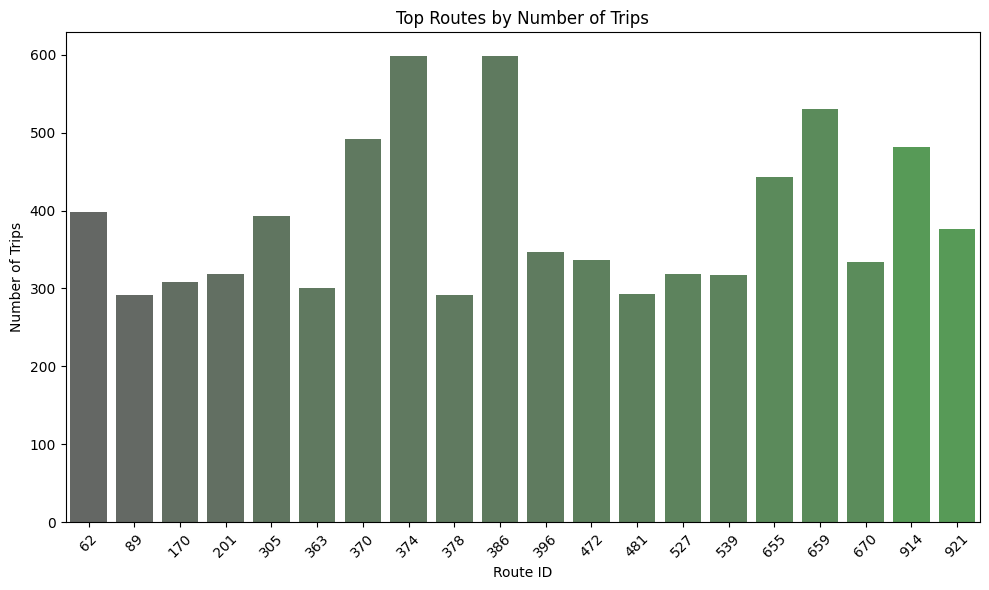

In [5]:
# Get the top routes by trip count
top_routes = trips['route_id'].value_counts().head(20)

# Convert top_routes to a DataFrame
top_routes_df = pd.DataFrame({
    'route_id': top_routes.index,
    'trip_count': top_routes.values
})

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_routes_df, x='route_id', y='trip_count', hue='route_id', palette='dark:green', alpha=0.7, legend=False)

plt.title('Top Routes by Number of Trips')
plt.xlabel('Route ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Stop Times Analysis

In [23]:
stop_times = pd.read_csv('data/stop_times.txt')

# Inspect stop_times.txt
print("\nStop Times DataFrame Info:")
print(stop_times.info())

# Function to convert GTFS time strings
def parse_gtfs_time(time_str):
    if pd.isna(time_str):
        return None
    try:
        hours, minutes, seconds = map(int, time_str.split(':'))
        # Adjust hours > 24 to next day
        hours = hours % 24
        return pd.Timestamp(f"{hours:02d}:{minutes:02d}:{seconds:02d}").time()
    except (ValueError, AttributeError):
        return pd.NaT.time() 

stop_times['arrival_time'] = stop_times['arrival_time'].apply(parse_gtfs_time)
stop_times['departure_time'] = stop_times['departure_time'].apply(parse_gtfs_time)

# Create hour columns for analysis (extracting hour from time objects)
stop_times['arrival_hour'] = pd.to_datetime(stop_times['arrival_time'].astype(str), format='%H:%M:%S', errors='coerce').dt.hour
stop_times['departure_hour'] = pd.to_datetime(stop_times['departure_time'].astype(str), format='%H:%M:%S', errors='coerce').dt.hour

stop_times.head()


Stop Times DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656564 entries, 0 to 656563
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   trip_id         656564 non-null  object 
 1   arrival_time    656564 non-null  object 
 2   departure_time  656564 non-null  object 
 3   stop_id         656564 non-null  object 
 4   stop_sequence   656564 non-null  int64  
 5   stop_headsign   0 non-null       float64
 6   pickup_type     656564 non-null  int64  
 7   drop_off_type   656564 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 40.1+ MB
None


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,arrival_hour,departure_hour
0,88____:007::8896008:8896735:8:647:20250228,06:04:00,06:04:00,8896008_5,1,NaN,0,1,6,6
1,88____:007::8896008:8896735:8:647:20250228,06:09:00,06:10:00,8896388_1,2,NaN,0,0,6,6
2,88____:007::8896008:8896735:8:647:20250228,06:13:00,06:14:00,8896370_1,3,NaN,0,0,6,6
3,88____:007::8896008:8896735:8:647:20250228,06:18:00,06:19:00,8896305_1,4,NaN,0,0,6,6
4,88____:007::8896008:8896735:8:647:20250228,06:23:00,06:24:00,8896396_1,5,NaN,0,0,6,6


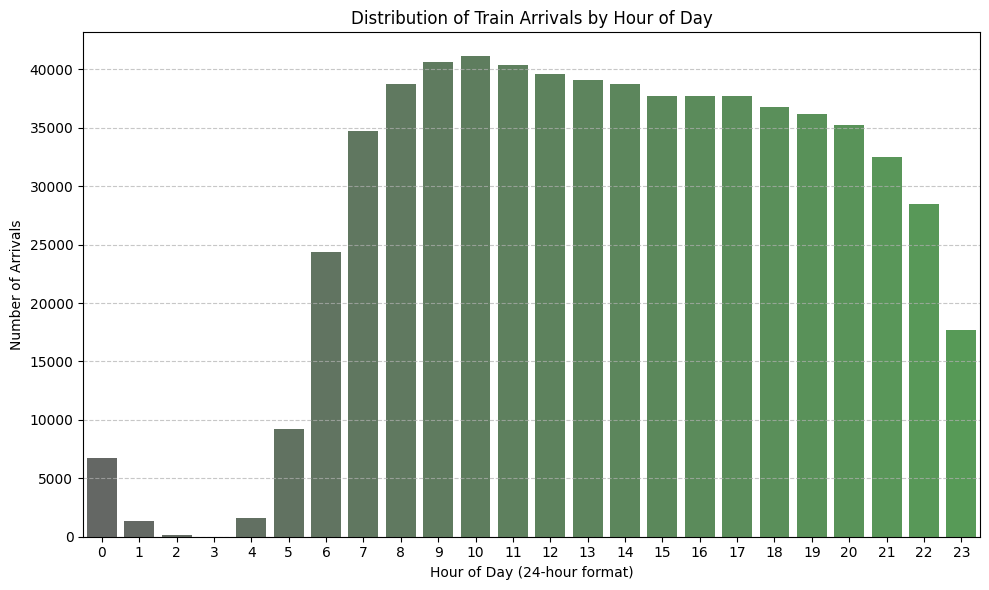

In [ ]:
# Arrival hours distribution
arrival_hours_dist = stop_times['arrival_hour'].value_counts().sort_index()

# Convert to DataFrame
arrival_hours_df = pd.DataFrame({
    'hour': arrival_hours_dist.index,
    'count': arrival_hours_dist.values
})

# Bar PLot
plt.figure(figsize=(10, 6))
sns.barplot(data=arrival_hours_df, x='hour', y='count', palette='dark:green', alpha=0.7, hue='hour', legend=False)

plt.title('Distribution of Train Arrivals by Hour of Day')
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Number of Arrivals')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Folium Graph to render all stops from the date

In [ ]:
stops_clean = stops.dropna(subset=['stop_lat', 'stop_lon'])

# Map centered on Belgium (approx. Brussels coordinates)
m = folium.Map(location=[50.85, 4.35], zoom_start=7)  # Adjust zoom as needed

# Markers for each stop
for _, row in stops_clean.iterrows():
    folium.Marker(
        location=[row['stop_lat'], row['stop_lon']],
        popup=row['stop_name'],  # Shows station name on click
        icon=folium.Icon(color='red', icon='train')  # Optional: train icon
    ).add_to(m)

# Save the map as HTML
m.save('plots/station_map_folium.html')

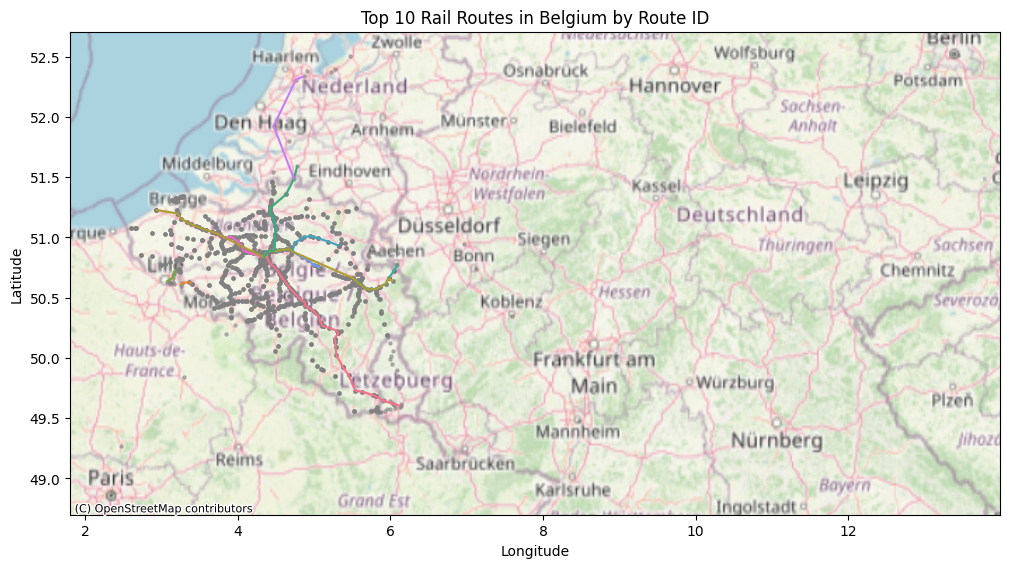

In [22]:
# Import libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure stops_clean and other DataFrames are ready (from your existing code)
stops_clean = stops.dropna(subset=['stop_lat', 'stop_lon'])

# Create a GeoDataFrame for stops (if not already done)
geometry = [Point(xy) for xy in zip(stops_clean['stop_lon'], stops_clean['stop_lat'])]
gdf_stops = gpd.GeoDataFrame(stops_clean, geometry=geometry, crs="EPSG:4326")

# Function to create route lines (unchanged)
def create_route_lines(route_id):
    # Get trips for this route
    route_trips = trips[trips['route_id'] == route_id]
    if route_trips.empty:
        return None
    
    # Take the first trip (simplification—could aggregate all trips)
    trip_id = route_trips['trip_id'].iloc[0]
    trip_stops = stop_times[stop_times['trip_id'] == trip_id].sort_values('stop_sequence')
    
    # Get stop coordinates in order
    stop_coords = []
    for stop_id in trip_stops['stop_id']:
        stop = stops_clean[stops_clean['stop_id'] == stop_id]
        if not stop.empty:
            stop_coords.append((stop['stop_lon'].iloc[0], stop['stop_lat'].iloc[0]))
    
    if len(stop_coords) < 2:  # Need at least 2 points for a line
        return None
    
    return LineString(stop_coords)

# Create a GeoDataFrame for routes with route_id
route_lines = []
route_ids = []
for route_id in routes['route_id'].unique():
    line = create_route_lines(route_id)
    if line is not None:
        route_lines.append(line)
        route_ids.append(route_id)

gdf_routes = gpd.GeoDataFrame({
    'route_id': route_ids,
    'geometry': route_lines
}, crs="EPSG:4326")

# Get the top 10 routes by trip count for coloring and legend
top_routes = trips['route_id'].value_counts().head(10).index
gdf_routes_top = gdf_routes[gdf_routes['route_id'].isin(top_routes)]

# Generate a color palette for the top 10 routes
n_routes = len(top_routes)
colors = sns.color_palette('husl', n_colors=n_routes)  # Use 'husl' for distinct, vibrant colors

# Create a color map for route_ids (only for top 10 routes)
color_map = {route_id: colors[i] for i, route_id in enumerate(top_routes)}
route_colors = [color_map.get(route_id, 'gray') for route_id in gdf_routes_top['route_id']]

# Plot the routes with different colors by route_id (for top 10 only)
plt.figure(figsize=(12, 10))

# Plot only the top routes
gdf_routes_top.plot(
    ax=plt.gca(),
    color=route_colors,
    linewidth=1.5,
    legend=True,
    legend_kwds={'loc': 'upper left', 'title': 'Route ID', 'labels': top_routes}
)

# Add stops as points (optional, for context)
gdf_stops.plot(ax=plt.gca(), marker='o', color='grey', markersize=5, alpha=0.5)

plt.title('Top 10 Rail Routes in Belgium by Route ID')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Optional: Add a basemap for better context
import contextily as ctx
ctx.add_basemap(plt.gca(), crs=gdf_routes.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Save the plot for GitHub/reporting
plt.savefig('plots/route_map_geopandas_by_routeid.png')
plt.show()